In [17]:
# Importing libraries and data
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [18]:
# Configure API Keys
quandl.ApiConfig.api_key = 'YVzmpa6irEUDKSAvJTt-'

In [19]:
# Federal Reserve Economic Data - Natural Rate of Umemployment
data = quandl.get('FRED/NROU')

In [20]:
data.head()

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182


In [21]:
data_2 = data.reset_index()

In [22]:
data_2.head()

,Date,Value
0,1949-01-01,5.255053
1,1949-04-01,5.261516
2,1949-07-01,5.268013
3,1949-10-01,5.274564
4,1950-01-01,5.281182


In [23]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2020-06-01')]

In [24]:
#Setting the date as the Index
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date'])# Create a datetime column from date
data_sub = data_sub.set_index('datetime')# set the datetime as the index of the dataframe
data_sub.drop(['Date'], axis=1,inplace = True)# drop the 'Date' column
data_sub.head()

,Value
datetime,
1980-01-01,6.217371
1980-04-01,6.210709
1980-07-01,6.203388
1980-10-01,6.195496
1981-01-01,6.187123


In [39]:
data_sub.columns

Index(['Value'], dtype='object')

Text(0, 0.5, 'Values')

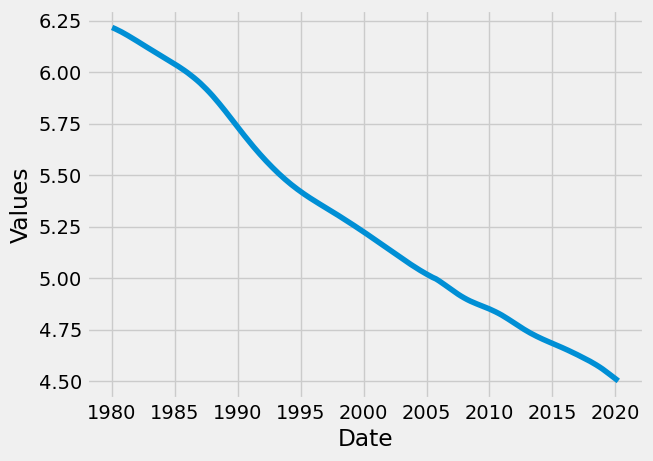

In [25]:

# Assuming data_sub has columns that you want to plot
columns_to_plot = data_sub.columns

# Create a line chart for each column
for column in columns_to_plot:
    plt.plot(data_sub.index, data_sub[column], label=column)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')


Time series Analysis

In [26]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

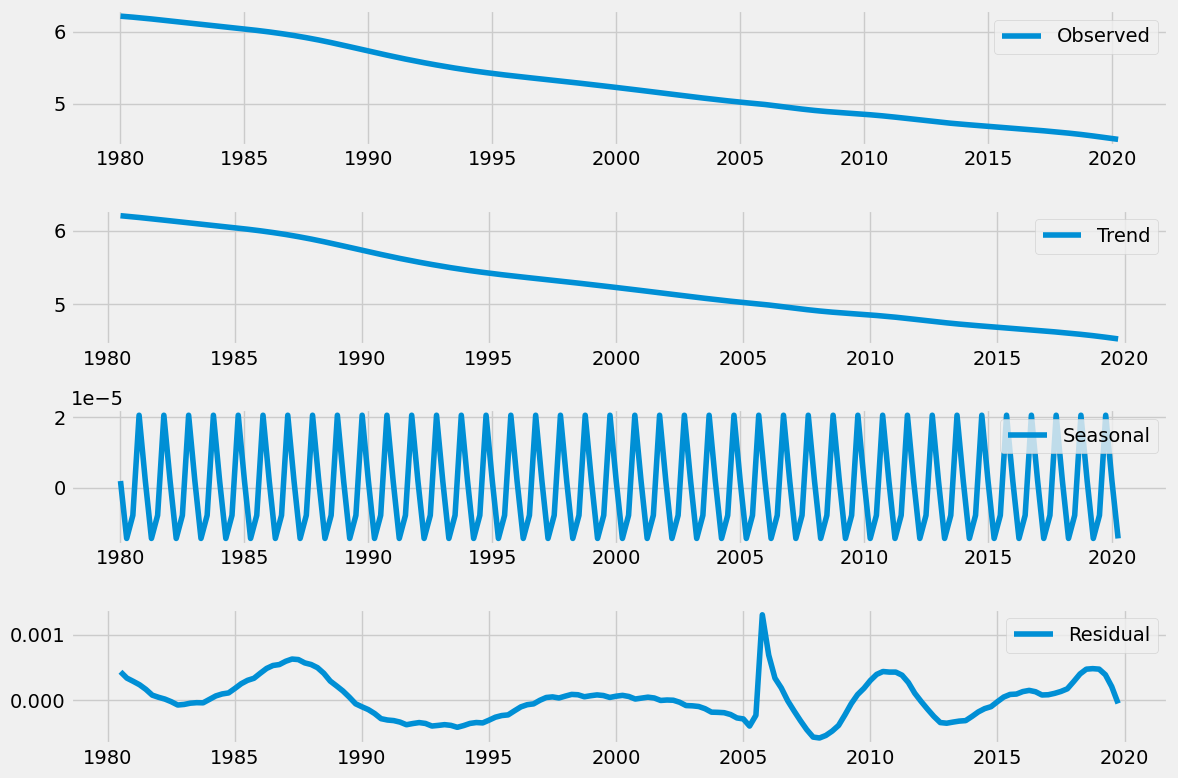

In [28]:

# Plot the original time series
plt.figure(figsize=(12, 8))

# Plot the observed values
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Display the chart
plt.show()



Observations:

Looking at the picture, it seems like the Consumer Price Index (CPI) has been going up over the years, which means prices are generally going up (inflation is increasing). There's a small drop in the CPI on the graph, and that happened right after the economic crisis in 2008.

Test to check for stationary
Dickey-Fuller test:

In [60]:
# Assuming 'data_sub' is your DataFrame with the datetime index
# Extract a specific column from your DataFrame for the test
# For example, assuming 'Component1' is the column you want to test
column_to_test = 'Value'

# Perform Dickey-Fuller test
result = sm.tsa.adfuller(data_sub[column_to_test], autolag='AIC')

# Extract and print the test results
adf_statistic, p_value, _, _, critical_values, _ = result
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Critical Values: {critical_values}')

# Interpret the results
if p_value <= 0.05:
    print("Reject the null hypothesis. The time series is stationary.")
else:
    print("Fail to reject the null hypothesis. The time series may not be stationary.")
    



ADF Statistic: -1.7453306935422803
p-value: 0.40792094151220326
Critical Values: {'1%': -3.472703119504854, '5%': -2.880131672353732, '10%': -2.5766826861130268}
Fail to reject the null hypothesis. The time series may not be stationary.


Test Statistic: -1.7453306935422803
P-value: 0.40792094151220326


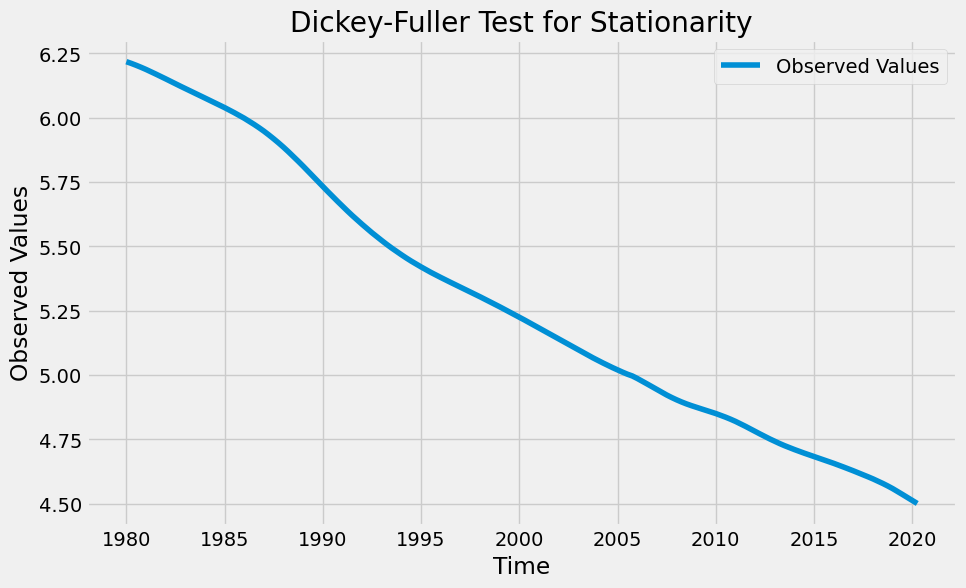

In [56]:
# Assuming 'data_sub' is your DataFrame with the datetime index
# Extract the observed values for the test
observed_values = data_sub['Value']  # Replace 'your_column' with the actual column name

# Perform the Dickey-Fuller test
result = sm.tsa.adfuller(observed_values)

# Print the test statistic and p-value
print(f'Test Statistic: {result[0]}')
print(f'P-value: {result[1]}')

# Plotting the observed values
plt.figure(figsize=(10, 6))
plt.plot(observed_values, label='Observed Values')
plt.title('Dickey-Fuller Test for Stationarity')
plt.xlabel('Time')
plt.ylabel('Observed Values')
plt.legend()

# Display the chart
plt.show()



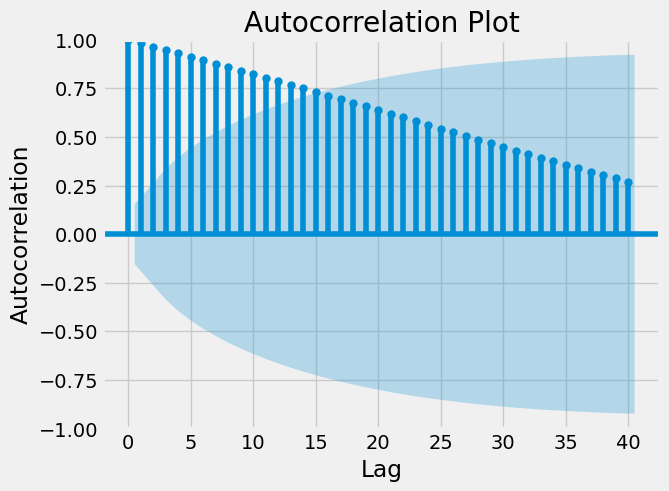

In [57]:
# Assuming 'data_sub' is your DataFrame with the datetime index
# Extract the observed values for the test
observed_values = data_sub['Value']  # Replace 'your_column' with the actual column name

# Create an autocorrelation plot
sm.graphics.tsa.plot_acf(observed_values, lags=40, alpha=0.05)

# Set plot properties
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Display the plot
plt.show()



Observation:Vertical lines as time gaps in the information, and the blue area as a zone of confidence. If the lines go above the top of the blue area, it shows that these time gaps are strongly linked. Since we see many lines outside this area, we can say the data is not stable or consistent over time.